In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os


In [2]:
# Spécifiez le chemin complet du répertoire contenant votre fichier CSV
chemin_du_repertoire = 'C:\\Users\\yvann\\OneDrive\\Documents\\Jedha\\CERTIFICATION BLOC 6'

# Changez le répertoire de travail
os.chdir(chemin_du_repertoire)

# Maintenant, vous pouvez lire le fichier CSV
df1 = pd.read_csv("all_time_teams.csv")
print(df1)

                 Franchise       Lg     From       To  Yrs     G     W     L  \
0            Atlanta Hawks      NBA  1968-69  2023-24   56  4492  2217  2275   
1          St. Louis Hawks      NBA  1955-56  1967-68   13  1005   553   452   
2          Milwaukee Hawks      NBA  1951-52  1954-55    4   281    91   190   
3    Tri-Cities Blackhawks      NBA  1949-50  1950-51    2   132    54    78   
4           Boston Celtics  NBA/BAA  1946-47  2023-24   78  6087  3613  2474   
..                     ...      ...      ...      ...  ...   ...   ...   ...   
99        Virginia Squires      ABA  1970-71  1975-76    6   503   200   303   
100    Washington Capitols      ABA  1969-70  1969-70    1    84    44    40   
101           Oakland Oaks      ABA  1967-68  1968-69    2   156    82    74   
102    Washington Capitols  NBA/BAA  1946-47  1950-51    5   271   157   114   
103         Waterloo Hawks      NBA  1949-50  1949-50    1    62    19    43   

      W/L%  Plyfs   Div  Conf  Champ   

In [3]:
df1.head()

,Franchise,Lg,From,To,Yrs,G,W,L,W/L%,Plyfs,Div,Conf,Champ,Status,Team Abbr,Current Abbr
0,Atlanta Hawks,NBA,1968-69,2023-24,56,4492,2217,2275,0.494,36,6.0,0,0,active,ATL,ATL
1,St. Louis Hawks,NBA,1955-56,1967-68,13,1005,553,452,0.550,12,6.0,0,1,active,STL,ATL
2,Milwaukee Hawks,NBA,1951-52,1954-55,4,281,91,190,0.324,0,0.0,0,0,active,MLH,ATL
3,Tri-Cities Blackhawks,NBA,1949-50,1950-51,2,132,54,78,0.409,1,0.0,0,0,active,TRI,ATL
4,Boston Celtics,NBA/BAA,1946-47,2023-24,78,6087,3613,2474,0.594,60,33.0,10,17,active,BOS,BOS


In [4]:
df1.drop(['Lg', 'Team Abbr', 'Current Abbr'], axis=1, inplace=True)
df1.head()

,Franchise,From,To,Yrs,G,W,L,W/L%,Plyfs,Div,Conf,Champ,Status
0,Atlanta Hawks,1968-69,2023-24,56,4492,2217,2275,0.494,36,6.0,0,0,active
1,St. Louis Hawks,1955-56,1967-68,13,1005,553,452,0.550,12,6.0,0,1,active
2,Milwaukee Hawks,1951-52,1954-55,4,281,91,190,0.324,0,0.0,0,0,active
3,Tri-Cities Blackhawks,1949-50,1950-51,2,132,54,78,0.409,1,0.0,0,0,active
4,Boston Celtics,1946-47,2023-24,78,6087,3613,2474,0.594,60,33.0,10,17,active


In [5]:
df1.to_csv('All time teams.csv', index=False)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Franchise  104 non-null    object 
 1   From       104 non-null    object 
 2   To         104 non-null    object 
 3   Yrs        104 non-null    int64  
 4   G          104 non-null    int64  
 5   W          104 non-null    int64  
 6   L          104 non-null    int64  
 7   W/L%       104 non-null    float64
 8   Plyfs      104 non-null    int64  
 9   Div        103 non-null    float64
 10  Conf       104 non-null    int64  
 11  Champ      104 non-null    int64  
 12  Status     104 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 10.7+ KB


In [16]:
titresNBA_par_franchise = df1.groupby('Franchise')['Champ'].sum()
titresNBA_par_franchise = titresNBA_par_franchise.sort_values(ascending=False)
print(titresNBA_par_franchise)


Franchise
Boston Celtics          17
Los Angeles Lakers      12
Chicago Bulls            6
Minneapolis Lakers       5
San Antonio Spurs        5
                        ..
Memphis Pros             0
Memphis Grizzlies        0
Los Angeles Stars        0
Los Angeles Clippers     0
Waterloo Hawks           0
Name: Champ, Length: 96, dtype: int64


In [17]:
titresCONF_par_franchise = df1.groupby('Franchise')['Conf'].sum()
titresCONF_par_franchise = titresCONF_par_franchise.sort_values(ascending=False)
print(titresCONF_par_franchise)

Franchise
Los Angeles Lakers       19
Boston Celtics           10
Miami Heat                7
Golden State Warriors     7
Chicago Bulls             6
                         ..
Memphis Grizzlies         0
Los Angeles Stars         0
Los Angeles Clippers      0
Kentucky Colonels         0
Waterloo Hawks            0
Name: Conf, Length: 96, dtype: int64


<Figure size 1500x1000 with 0 Axes>

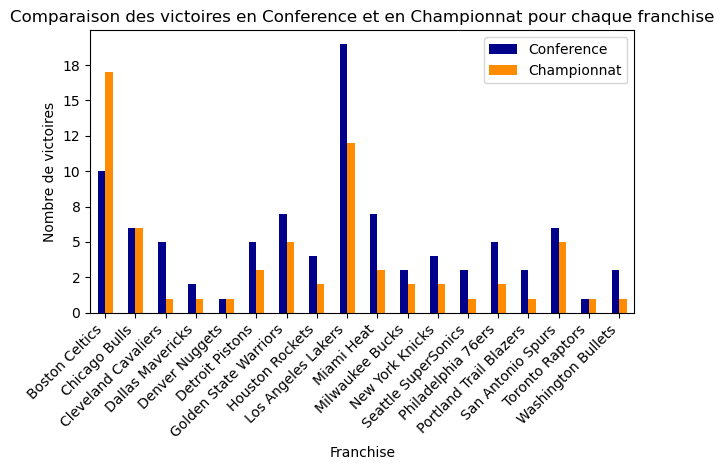

In [45]:
# Filtrer les franchises ayant gagné à la fois la Conférence et le Championnat
df_filtered = df1[(df1['Conf'] > 0) & (df1['Champ'] > 0)]

# Créer un graphique à barres
plt.figure(figsize=(15, 10))
df_filtered.plot(kind='bar', x='Franchise', y=['Conf', 'Champ'], color=['darkblue', 'darkorange'])
plt.title('Comparaison des victoires en Conference et en Championnat pour chaque franchise')
plt.xlabel('Franchise')
plt.ylabel('Nombre de victoires')
plt.xticks(rotation=45, ha='right')
plt.legend(['Conference', 'Championnat'])

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().set_major_formatter('{:.0f}'.format)
plt.tight_layout()
plt.show()